Use the real clusters in NGC 628-c to see what the peak values should be for the clusters.

In [1]:
import sys
from pathlib import Path
from astropy import table
from astropy.io import fits
import numpy as np

import betterplotlib as bpl
bpl.set_style()

In [2]:
sys.path.append("../pipeline/")
import utils

In [3]:
cat_name = "../data/ngc628-c/size/final_catalog_final_30_pixels_psf_my_stars_15_pixels_2x_oversampled.txt"
cat = table.Table.read(cat_name, format="ascii.ecsv")

In [4]:
base_image = utils._get_image(Path("../data/ngc628-c/").resolve())[0]
image = base_image.data * base_image.header["EXPTIME"]

Go through and find the highest pixel value in each of the cluster regions. I'll do a small box to only get the cluster peak

In [5]:
max_values = []
for row in cat:
    x_cen = int(np.ceil(row["x"]))
    y_cen = int(np.ceil(row["y"]))
    # Get the snapshot, based on the size desired.
    snapshot_half_length = 4
    x_min = x_cen - snapshot_half_length
    x_max = x_cen + snapshot_half_length
    y_min = y_cen - snapshot_half_length
    y_max = y_cen + snapshot_half_length

    image_region = image[y_min:y_max, x_min:x_max]
    
    max_values.append(np.max(image_region))

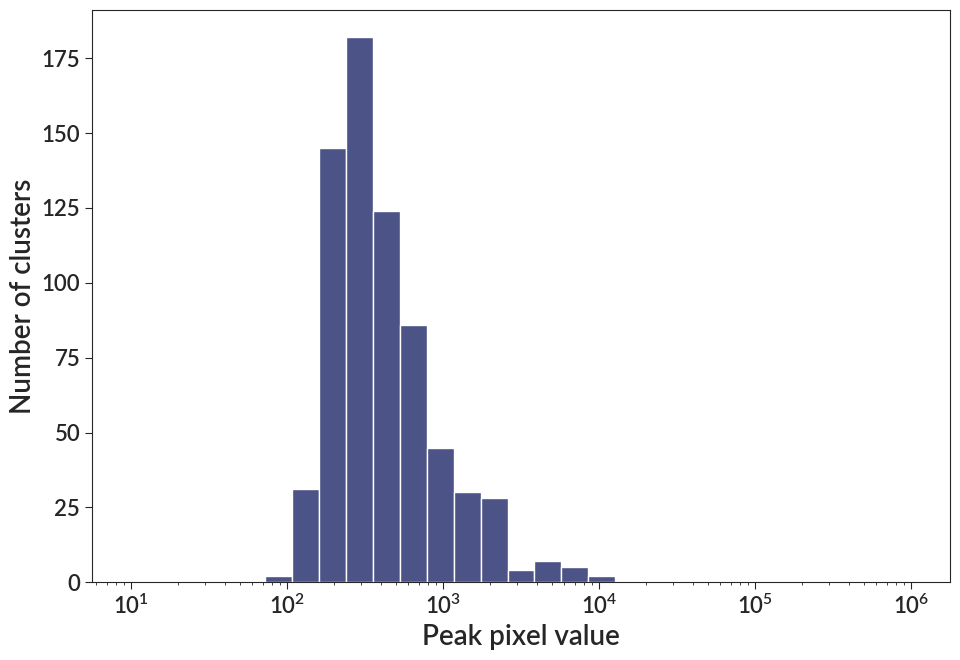

In [6]:
fig, ax = bpl.subplots()
ax.hist(max_values, bins=np.logspace(1, 6, 30))
ax.set_xscale("log")
ax.add_labels("Peak pixel value", "Number of clusters")

# checking chosen locations

In [7]:
cat_fake = table.Table.read("../data/artificial/true_catalog.txt", format="ascii.ecsv")

In [8]:
left_chip_points = [
    (25, 2340),
    (1780, 7000),
    (4000, 5950),
    (2200, 1250),
    (25, 2340),
]
right_chip_points = [
    (2300, 1200),
    (4140, 5900),
    (6450, 4830),
    (4550, 110),
    (2300, 1200),
]

left_x = [p[0] for p in left_chip_points]
left_y = [p[1] for p in left_chip_points]
right_x = [p[0] for p in right_chip_points]
right_y = [p[1] for p in right_chip_points]

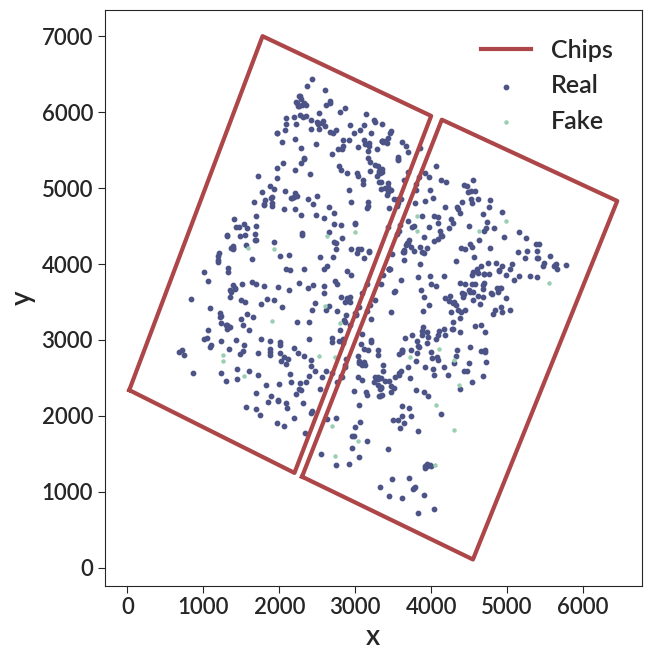

In [9]:
fig, ax = bpl.subplots()
ax.scatter(cat["x"], cat["y"], alpha=1, s=10, label="Real")
ax.scatter(cat_fake["x"], cat_fake["y"], s=5, alpha=1, label="Fake")
ax.plot(left_x, left_y, c=bpl.color_cycle[3], label="Chips")
ax.plot(right_x, right_y, c=bpl.color_cycle[3])
ax.equal_scale()
ax.add_labels("x", "y")
ax.legend(frameon=False)